In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv(r"C:\Users\aabidh musthaq\Desktop\machine lerning assaigment\ObesityDataSet_raw_and_data_sinthetic.csv")

## Data Exploration and Preprocessing

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
df.shape

(2111, 17)

In [6]:
df.duplicated().sum() #duplicate 12 

24

In [7]:
round((df.isnull().sum()/df.shape[0])*100,2) #checking null value %

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64

In [8]:
df.info() #age integer, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [9]:
df["NObeyesdad"].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [10]:
df["FAVC"].value_counts()

yes    1866
no      245
Name: FAVC, dtype: int64

In [11]:
df["CAEC"].value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

In [12]:
df["SMOKE"].value_counts()

no     2067
yes      44
Name: SMOKE, dtype: int64

In [13]:
df["MTRANS"].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [14]:
df["Gender"].value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

In [15]:
df["family_history_with_overweight"].value_counts()

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

In [16]:
df["SCC"].value_counts()

no     2015
yes      96
Name: SCC, dtype: int64

In [17]:
df = df.drop_duplicates()

In [18]:
df = df.reset_index()

In [19]:
df['Age'] = df['Age'].astype('int')
df['NCP'] = df['NCP'].astype('int')
df['FCVC'] = df['FCVC'].astype('int')

In [20]:
# Define the mapping dictionary
mapping = {'no': 0, 'yes': 1}

df['FAVC'] = df['FAVC'].map(mapping)
df['SMOKE'] = df['SMOKE'].map(mapping)
df['family_history_with_overweight'] = df['family_history_with_overweight'].map(mapping)
df['SCC'] = df['SCC'].map(mapping)

In [21]:
mapping = {'Sometimes': 0, 'Frequently': 1,'Always': 2, 'no': 3 }
df['CAEC'] = df['CAEC'].map(mapping)
df['CALC'] = df['CALC'].map(mapping)

In [22]:
def categorize_transportation(mode):
    if mode in ['Public_Transportation']:
        return 'Public Transportation'
    elif mode in ['Automobile', 'Motorbike']:
        return 'Private Motorized Transportation'
    elif mode in ['Walking', 'Bike']:
        return 'Non-Motorized Transportation'
    else:
        return 'Other'

# Applying the function to the 'MTRANS' column
df['MTRANS'] = df['MTRANS'].apply(categorize_transportation)

In [23]:
df = pd.get_dummies(df, columns=['MTRANS'])

In [24]:
df.head()

,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Non-Motorized Transportation,MTRANS_Private Motorized Transportation,MTRANS_Public Transportation
0,0,Female,21,1.62,64.0,1,0,2,3,0,0,2.0,0,0.0,1.0,3,Normal_Weight,0,0,1
1,1,Female,21,1.52,56.0,1,0,3,3,0,1,3.0,1,3.0,0.0,0,Normal_Weight,0,0,1
2,2,Male,23,1.80,77.0,1,0,2,3,0,0,2.0,0,2.0,1.0,1,Normal_Weight,0,0,1
3,3,Male,27,1.80,87.0,0,0,3,3,0,0,2.0,0,2.0,0.0,1,Overweight_Level_I,1,0,0
4,4,Male,22,1.78,89.8,0,0,2,1,0,0,2.0,0,0.0,0.0,0,Overweight_Level_II,0,0,1


In [25]:
# Define the mapping dictionary
mapping = {'Male': 1, 'Female': 0}
df['Gender'] = df['Gender'].map(mapping)

In [26]:
# Mapping dictionary
obesity_mapping = {
    'Obesity_Type_I': 0,
    'Obesity_Type_II': 1,
    'Obesity_Type_III': 2,
    'Overweight_Level_I': 3,
    'Overweight_Level_II': 4,
    'Normal_Weight': 5,
    'Insufficient_Weight': 6
}

df['NObeyesdad'] = df['NObeyesdad'].map(obesity_mapping)

In [27]:
df.head()

,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Non-Motorized Transportation,MTRANS_Private Motorized Transportation,MTRANS_Public Transportation
0,0,0,21,1.62,64.0,1,0,2,3,0,0,2.0,0,0.0,1.0,3,5,0,0,1
1,1,0,21,1.52,56.0,1,0,3,3,0,1,3.0,1,3.0,0.0,0,5,0,0,1
2,2,1,23,1.80,77.0,1,0,2,3,0,0,2.0,0,2.0,1.0,1,5,0,0,1
3,3,1,27,1.80,87.0,0,0,3,3,0,0,2.0,0,2.0,0.0,1,3,1,0,0
4,4,1,22,1.78,89.8,0,0,2,1,0,0,2.0,0,0.0,0.0,0,4,0,0,1


## Exploratory data analysis

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

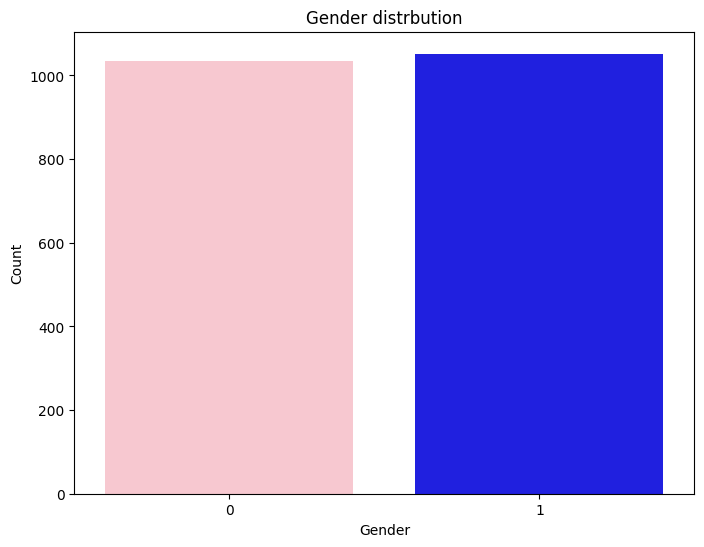

In [29]:
# Create a count plot for the 'Gender' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette={0: 'pink', 1: 'blue'})

# Add title and labels
plt.title('Gender distrbution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()


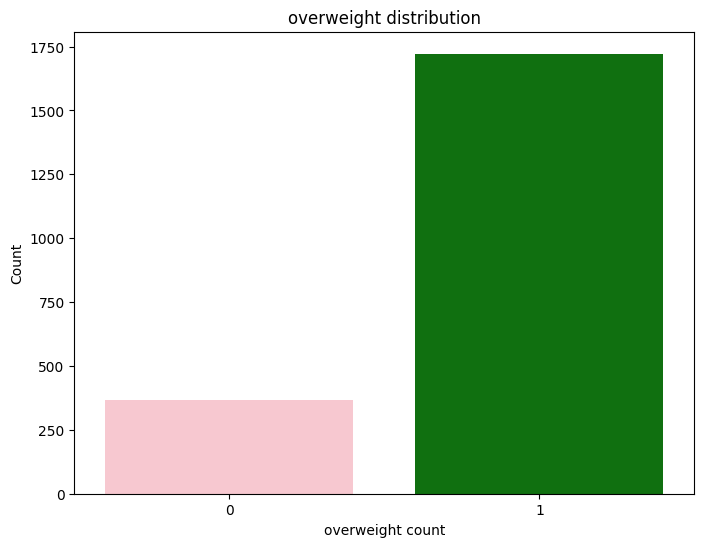

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='family_history_with_overweight', palette={0: 'pink', 1: 'green'})

plt.title('overweight distribution')
plt.xlabel('overweight count')
plt.ylabel('Count')
# Show the plot
plt.show()

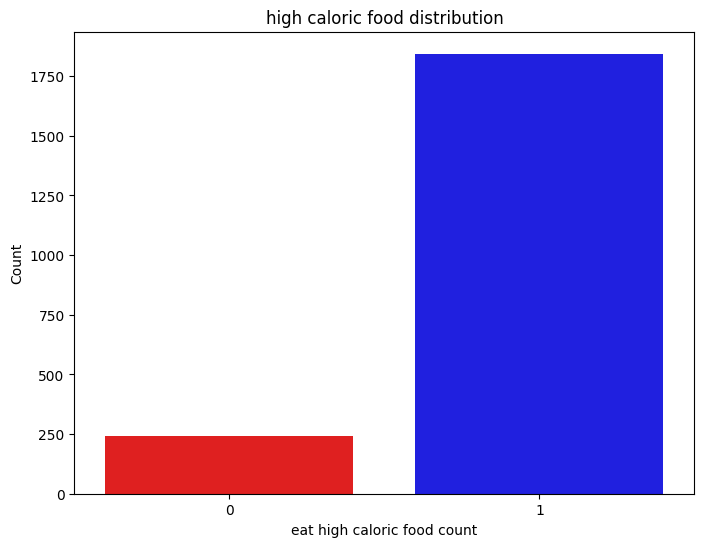

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='FAVC', palette={0: 'red', 1: 'blue'})

plt.title('high caloric food distribution')
plt.xlabel('eat high caloric food count')
plt.ylabel('Count')
plt.show()

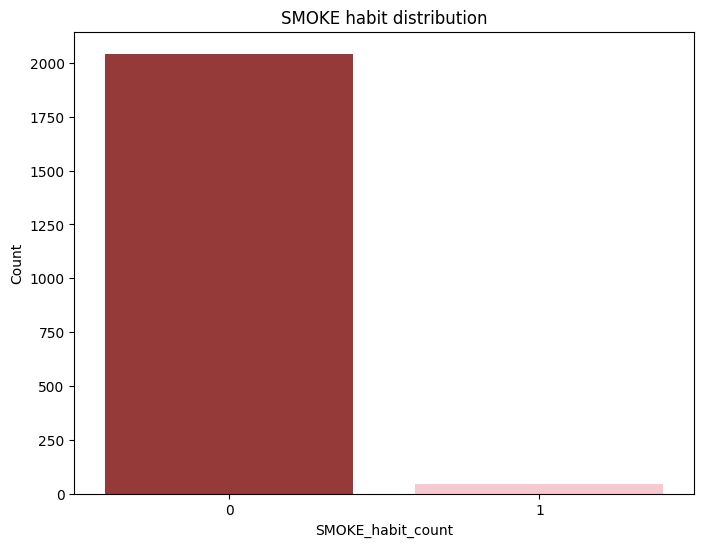

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SMOKE', palette={0: 'brown', 1: 'pink'})

plt.title('SMOKE habit distribution')
plt.xlabel('SMOKE_habit_count')
plt.ylabel('Count')
plt.show()

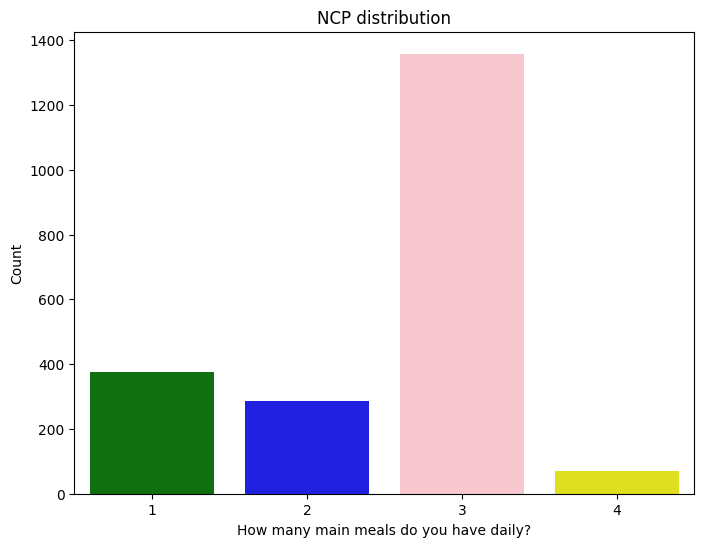

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NCP', palette={3: 'pink', 1: 'green',2: 'blue',4: 'Yellow'})

plt.title('NCP distribution')
plt.xlabel('How many main meals do you have daily?')
plt.ylabel('Count')
plt.show()

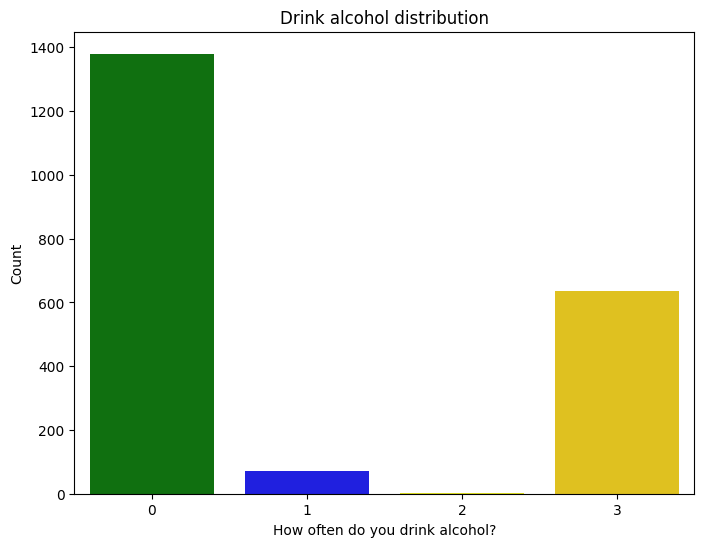

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='CALC', palette={0: 'green',1: 'blue',2: 'Yellow',3:'gold'})

plt.title('Drink alcohol distribution')
plt.xlabel('How often do you drink alcohol?')
plt.ylabel('Count')
plt.show()

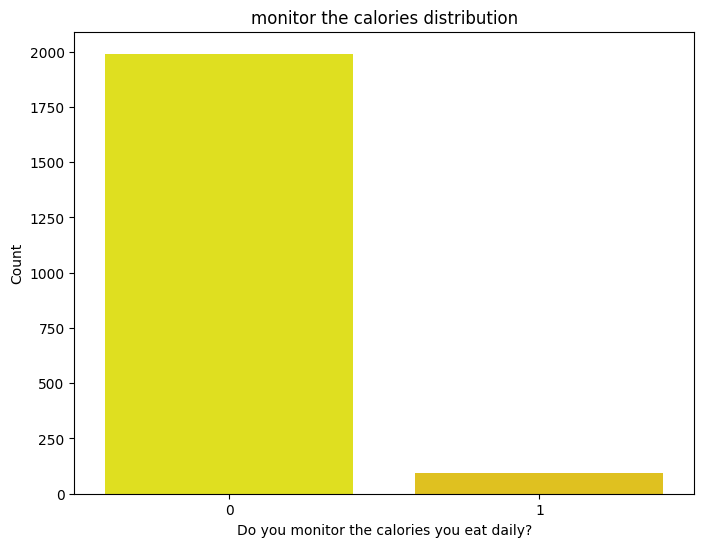

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SCC', palette={0: 'Yellow',1: 'gold'})

plt.title('monitor the calories distribution')
plt.xlabel('Do you monitor the calories you eat daily?')
plt.ylabel('Count')
plt.show()

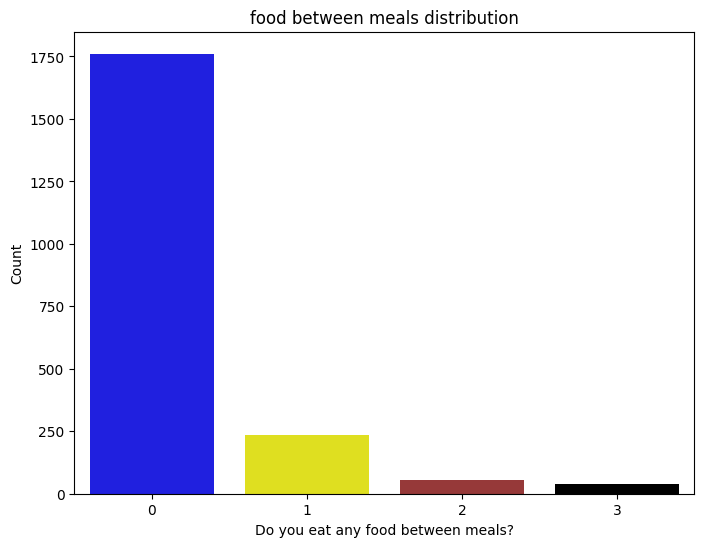

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='CAEC', palette={0: 'blue',1: 'yellow',2:'brown',3:'black'})

plt.title('food between meals distribution')
plt.xlabel('Do you eat any food between meals?')
plt.ylabel('Count')
plt.show()

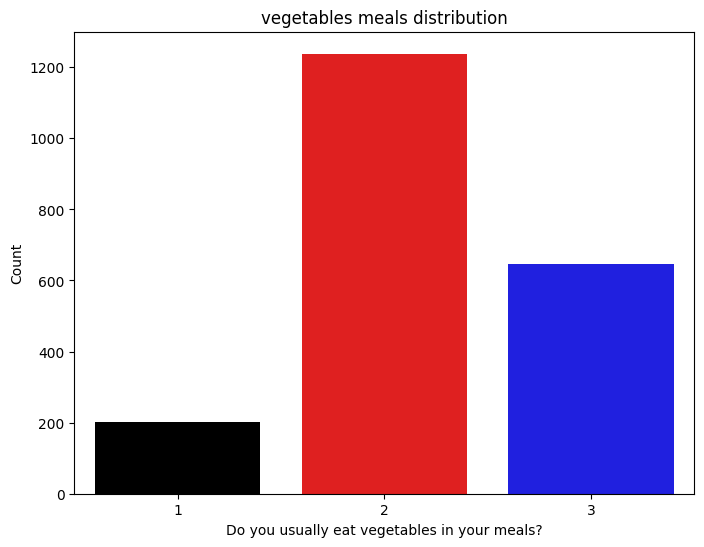

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='FCVC', palette={1: 'black',2:'red',3:'blue'})

plt.title('vegetables meals distribution')
plt.xlabel('Do you usually eat vegetables in your meals?')
plt.ylabel('Count')
plt.show()

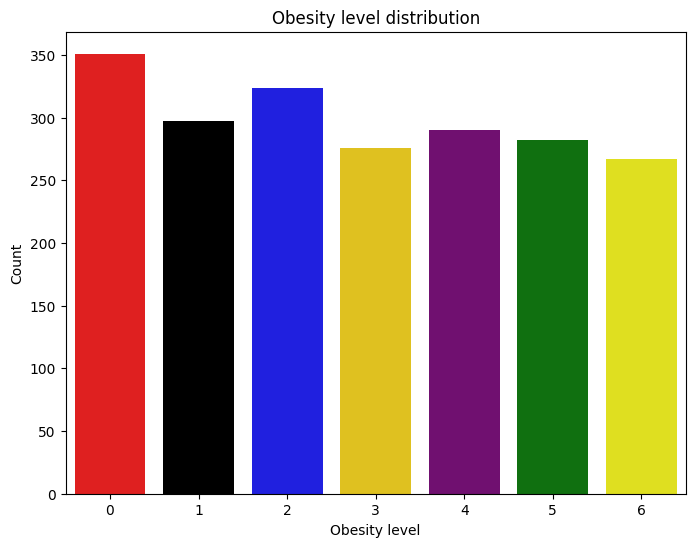

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NObeyesdad', palette={0:'red',1: 'black',2:'blue',3:'gold',4:'purple',5:'green',6:'yellow'})

plt.title('Obesity level distribution')
plt.xlabel('Obesity level')
plt.ylabel('Count')
plt.show()

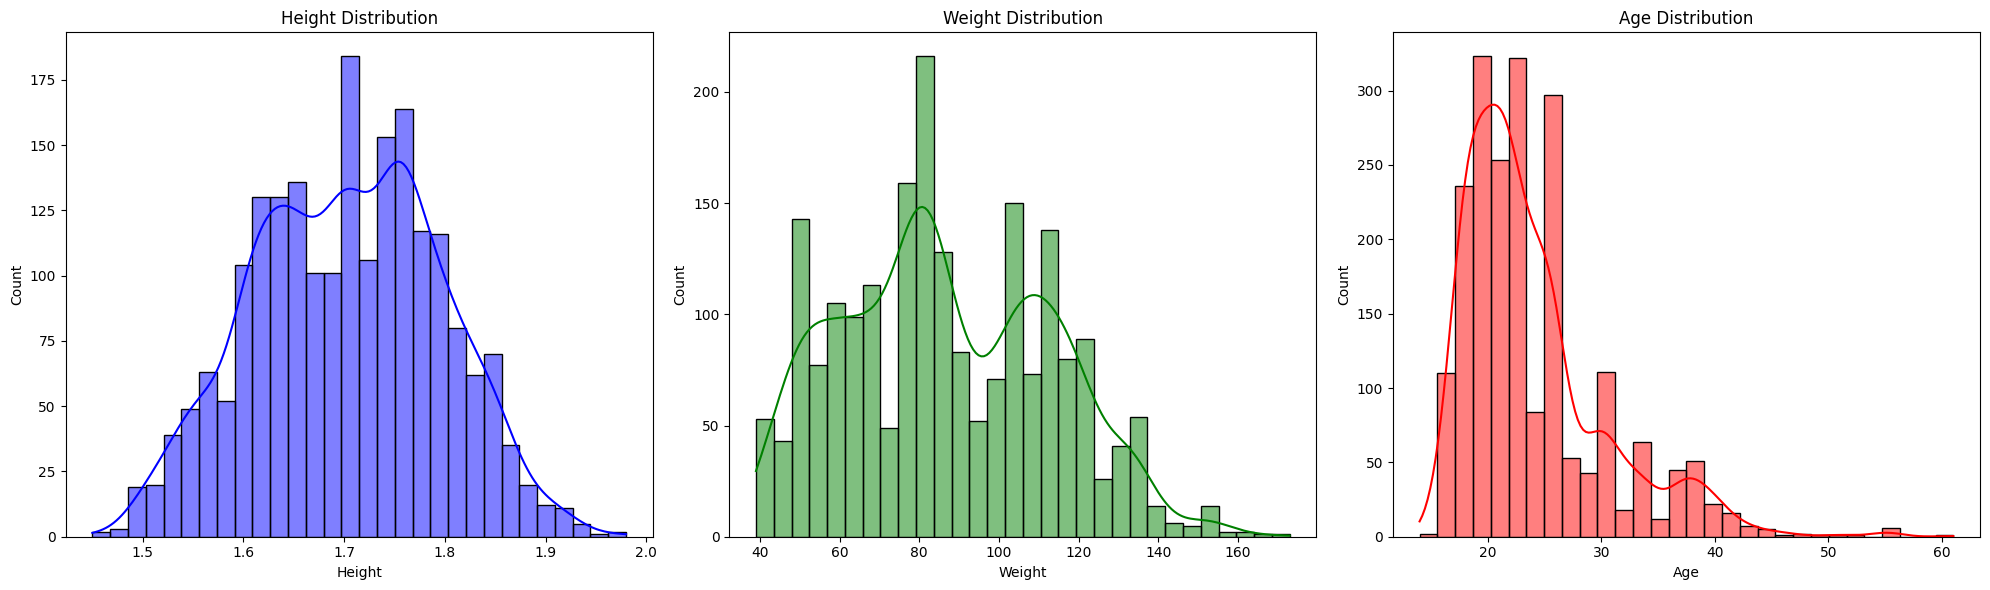

In [39]:
# Setting the figure size
plt.figure(figsize=(20, 6))

# Distribution plot for Height
plt.subplot(131)
sns.histplot(df['Height'], kde=True, bins=30, color='blue')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Count')

# Distribution plot for Weight
plt.subplot(132)
sns.histplot(df['Weight'], kde=True, bins=30, color='green')
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Count')

# Distribution plot for Age
plt.subplot(133)
sns.histplot(df['Age'], kde=True, bins=30, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

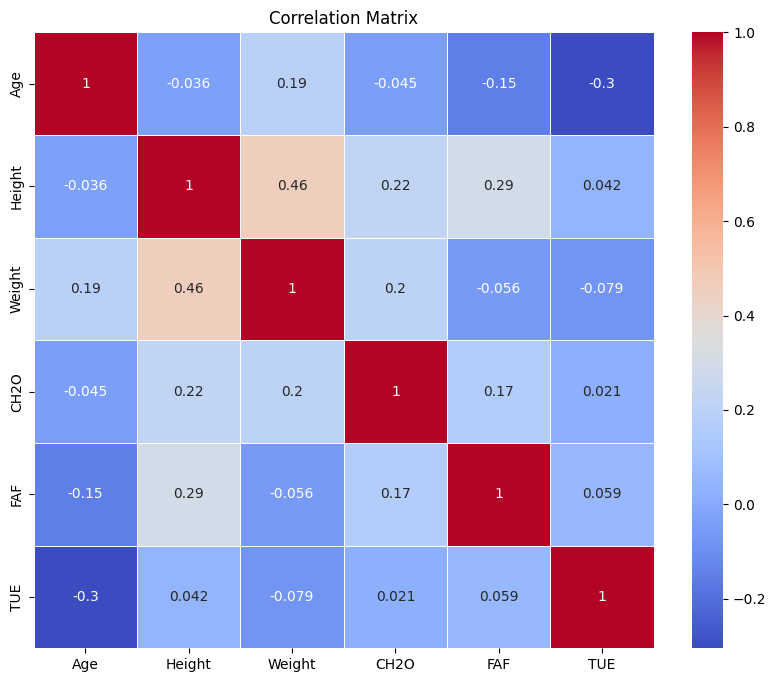

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the relevant columns
# Calculating the correlation matrix
correlation_matrix = df[['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [41]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame

# List of categorical variables and the target variable
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'CALC', 'SMOKE', 'SCC', 'NCP']
target_var = 'NObeyesdad'

# Function to perform chi-square test and return p-values
def chi_square_test(df, categorical_vars, target_var):
    p_values = {}
    for var in categorical_vars:
        contingency_table = pd.crosstab(df[var], df[target_var])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        p_values[var] = p
    return p_values

# Perform chi-square tests
p_values = chi_square_test(df, categorical_vars, target_var)

# Output p-values
print("Chi-square test p-values:")
for var, p in p_values.items():
    print(f"{var}: {p}")

# Determine which variables to keep (p < 0.05 for significance)
significant_vars = [var for var, p in p_values.items() if p < 0.05]
print("Significant variables to keep:")
print(significant_vars)

Chi-square test p-values:
Gender: 9.357967638720334e-139
family_history_with_overweight: 3.5241561087034105e-130
FAVC: 4.0897083168071957e-47
CAEC: 6.30125789731839e-142
CALC: 2.22093967310428e-60
SMOKE: 1.73979060827963e-05
SCC: 3.3385130651942555e-25
NCP: 9.260786618325458e-94
Significant variables to keep:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'CALC', 'SMOKE', 'SCC', 'NCP']


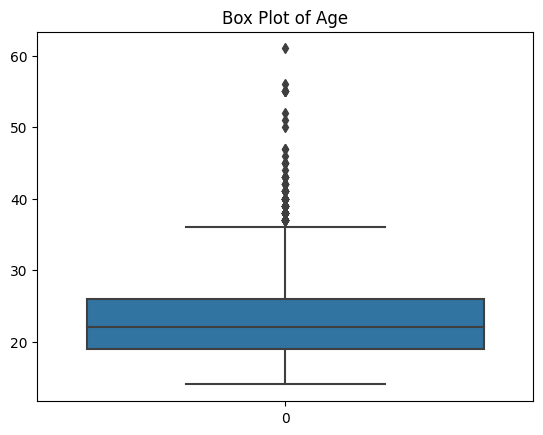

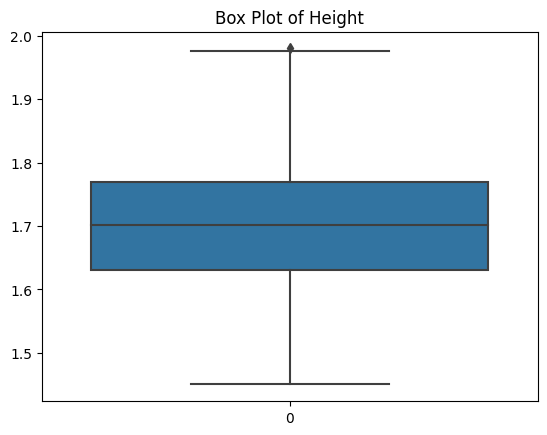

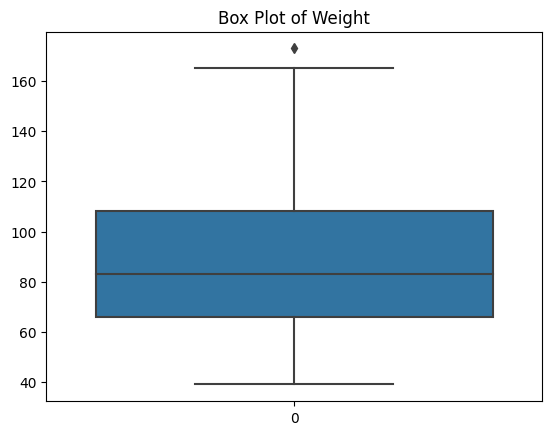

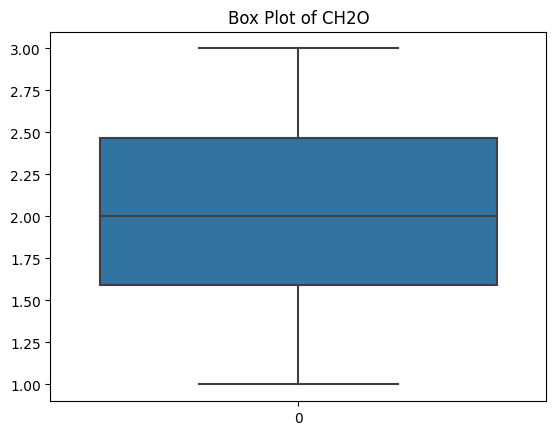

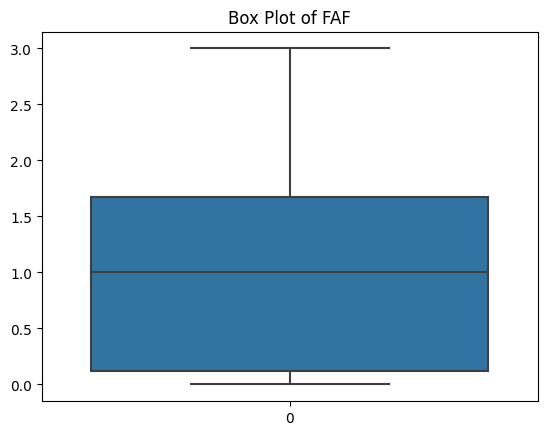

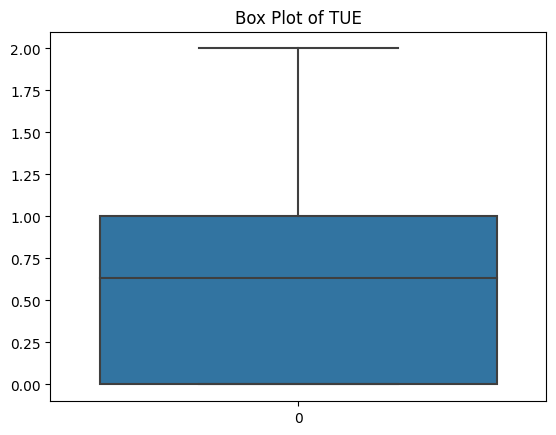

Outliers based on IQR method:
Age:
      index  Gender  Age    Height      Weight  \
13       13       1   41  1.800000   99.000000   
21       21       0   52  1.690000   87.000000   
33       33       1   39  1.790000   90.000000   
92       92       1   55  1.780000   84.000000   
103     104       0   38  1.560000   80.000000   
...     ...     ...  ...       ...         ...   
1716   1740       1   37  1.763582  117.861590   
1751   1775       1   37  1.762921  118.401740   
1752   1776       1   38  1.752863  119.201465   
1753   1777       1   38  1.768235  117.792268   
1754   1778       1   38  1.766888  118.134898   

      family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  \
13                                 0     1     2    3     0      0  2.000000   
21                                 1     1     3    1     0      1  2.000000   
33                                 0     0     2    1     0      0  2.000000   
92                                 1     0  

In [42]:
import seaborn as sns
from scipy import stats

def plot_boxplots(data, columns):
    for column in columns:
        sns.boxplot(data[column])
        plt.title(f'Box Plot of {column}')
        plt.show()

plot_boxplots(df, ['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE'])

# Statistical Methods
def detect_outliers_iqr(data, columns):
    outliers = {}
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outliers_iqr = detect_outliers_iqr(df, ['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE'])
print("Outliers based on IQR method:")
for column, outlier_data in outliers_iqr.items():
    print(f'{column}:')
    print(outlier_data)

def detect_outliers_zscore(data, columns):
    outliers = {}
    for column in columns:
        z_scores = np.abs(stats.zscore(data[column]))
        outliers[column] = data[z_scores > 3]
    return outliers

outliers_zscore = detect_outliers_zscore(df, ['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE'])
print("Outliers based on Z-score method:")
for column, outlier_data in outliers_zscore.items():
    print(f'{column}:')
    print(outlier_data)

## Model Selection

### Classfication

In [43]:
# Import libraries for ML Models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
# Import libraries for model testing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [45]:
df.head()

,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Non-Motorized Transportation,MTRANS_Private Motorized Transportation,MTRANS_Public Transportation
0,0,0,21,1.62,64.0,1,0,2,3,0,0,2.0,0,0.0,1.0,3,5,0,0,1
1,1,0,21,1.52,56.0,1,0,3,3,0,1,3.0,1,3.0,0.0,0,5,0,0,1
2,2,1,23,1.80,77.0,1,0,2,3,0,0,2.0,0,2.0,1.0,1,5,0,0,1
3,3,1,27,1.80,87.0,0,0,3,3,0,0,2.0,0,2.0,0.0,1,3,1,0,0
4,4,1,22,1.78,89.8,0,0,2,1,0,0,2.0,0,0.0,0.0,0,4,0,0,1


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [47]:
# Columns to standardize
columns_to_scale = ['Age', 'Height', 'CH2O', 'FAF', 'TUE']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [48]:
df.head()

,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Non-Motorized Transportation,MTRANS_Private Motorized Transportation,MTRANS_Public Transportation
0,0,0,-0.475238,-0.887408,64.0,1,0,2,3,0,0,-0.007810,0,-1.186977,0.554211,3,5,0,0,1
1,1,0,-0.475238,-1.960788,56.0,1,0,3,3,0,1,1.636552,1,2.328908,-1.090505,0,5,0,0,1
2,2,1,-0.159371,1.044677,77.0,1,0,2,3,0,0,-0.007810,0,1.156947,0.554211,1,5,0,0,1
3,3,1,0.472363,1.044677,87.0,0,0,3,3,0,0,-0.007810,0,1.156947,-1.090505,1,3,1,0,0
4,4,1,-0.317305,0.830001,89.8,0,0,2,1,0,0,-0.007810,0,-1.186977,-1.090505,0,4,0,0,1


In [49]:
# Function to count and remove outliers using the Z-score method
def count_and_remove_outliers_zscore(data, columns, threshold=3):
    outliers_count = {}
    data_cleaned = data.copy()
    
    for column in columns:
        z_scores = np.abs(stats.zscore(data[column]))
        outliers_count[column] = (z_scores > threshold).sum()
        data_cleaned = data_cleaned[z_scores <= threshold]
        
    return outliers_count, data_cleaned

In [50]:
# Columns to check for outliers
columns_to_check = ['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE']

# Count and remove outliers
outliers_zscore_count, df_cleaned = count_and_remove_outliers_zscore(df, columns_to_check)

# Print the number of outliers
print("Number of outliers based on Z-score method:")
for column, count in outliers_zscore_count.items():
    print(f'{column}: {count}')

Number of outliers based on Z-score method:
Age: 18
Height: 0
Weight: 1
CH2O: 0
FAF: 0
TUE: 0


c:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == "__main__":


In [51]:
df = df_cleaned

## Regression

In [52]:
df.head()

,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Non-Motorized Transportation,MTRANS_Private Motorized Transportation,MTRANS_Public Transportation
0,0,0,-0.475238,-0.887408,64.0,1,0,2,3,0,0,-0.007810,0,-1.186977,0.554211,3,5,0,0,1
1,1,0,-0.475238,-1.960788,56.0,1,0,3,3,0,1,1.636552,1,2.328908,-1.090505,0,5,0,0,1
2,2,1,-0.159371,1.044677,77.0,1,0,2,3,0,0,-0.007810,0,1.156947,0.554211,1,5,0,0,1
3,3,1,0.472363,1.044677,87.0,0,0,3,3,0,0,-0.007810,0,1.156947,-1.090505,1,3,1,0,0
4,4,1,-0.317305,0.830001,89.8,0,0,2,1,0,0,-0.007810,0,-1.186977,-1.090505,0,4,0,0,1


In [53]:
df1 = df[['Height', 'Weight', 'Age', 'Gender', 'FCVC', 'TUE', 'FAF', 'CH2O','NObeyesdad']]

In [54]:
X = df1.drop(['Weight'], axis=1)
Y = df1['Weight']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [57]:
# Initialize the models
models = {
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}

In [59]:
def compare_models_regression():
    for name, model in models.items():
        # Train the model
        if name == 'Support Vector Regressor':
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
        else:
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)

        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Print evaluation metrics
        print(f'{name} metrics:')
        print('Mean Absolute Error:', mae)
        print('Mean Squared Error:', mse)
        print('R² Score:', r2)
        print()

# Run the function to compare models
compare_models_regression()

Decision Tree Regressor metrics:
Mean Absolute Error: 2.1485346980676328
Mean Squared Error: 17.031420178363955
R² Score: 0.9763040083598998

Random Forest Regressor metrics:
Mean Absolute Error: 1.6864130311433148
Mean Squared Error: 8.632278800461977
R² Score: 0.987989820922238

Support Vector Regressor metrics:
Mean Absolute Error: 6.591046758276776
Mean Squared Error: 89.62469435032614
R² Score: 0.8753042326576038



## Hyper parameter tunning 

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint, uniform

# Define the parameter grid with a smaller range of values
param_grid = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Initialize the model
model = DecisionTreeRegressor()

# Perform RandomizedSearchCV with reduced n_iter and n_jobs
search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, random_state=42, n_jobs=1)
search.fit(x_train, y_train)  # Replace X_train and y_train with your training data

print(f"Best parameters: {search.best_params_}")

Best parameters: {'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 12}


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Initialize the models
models = {
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}

# Define the parameter grids for each model
param_grids = {
    'Random Forest Regressor': {
        'n_estimators': randint(10, 100),  # Reduced range
        'max_features': uniform(0.1, 0.5),  # Reduced range
        'max_depth': randint(1, 15),  # Reduced range
        'min_samples_split': randint(2, 10),  # Reduced range
        'min_samples_leaf': randint(1, 10)  # Reduced range
    },
    'Support Vector Regressor': {
        'C': uniform(0.1, 5),  # Reduced range
        'epsilon': uniform(0.01, 0.5),  # Reduced range
        'kernel': ['linear', 'rbf']  # Reduced number of kernels
    }
}

# Perform RandomizedSearchCV for each model
best_params = {}
for name, model in models.items():
    print(f"Optimizing {name}...")
    search = RandomizedSearchCV(model, param_grids[name], n_iter=10, cv=5, random_state=42, n_jobs=1)  # Set n_jobs=1 to limit parallelism
    search.fit(x_train, y_train)  # Replace x_train and y_train with your training data
    best_params[name] = search.best_params_
    print(f"Best parameters for {name}: {best_params[name]}")

print("Best parameters for all models:", best_params)


Optimizing Random Forest Regressor...
Best parameters for Random Forest Regressor: {'max_depth': 9, 'max_features': 0.5828160165372797, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 18}
Optimizing Support Vector Regressor...
Best parameters for Support Vector Regressor: {'C': 4.968777594207295, 'epsilon': 0.12638567021515212, 'kernel': 'rbf'}
Best parameters for all models: {'Random Forest Regressor': {'max_depth': 9, 'max_features': 0.5828160165372797, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 18}, 'Support Vector Regressor': {'C': 4.968777594207295, 'epsilon': 0.12638567021515212, 'kernel': 'rbf'}}


In [66]:
# Initialize the models
models = {
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth = 8,min_samples_leaf = 7, min_samples_split = 12),
    'Random Forest Regressor': RandomForestRegressor(max_depth = 9, max_features = 0.5828160165372797, min_samples_leaf = 2, min_samples_split= 3, n_estimators= 18),
    'Support Vector Regressor': SVR(C =4.968777594207295, epsilon = 0.12638567021515212, kernel ='rbf')
}

In [67]:
def compare_models_regression1():
    for name, model in models.items():
        # Train the model
        if name == 'Support Vector Regressor':
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
        else:
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)

        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Print evaluation metrics
        print(f'{name} metrics:')
        print('Mean Absolute Error:', mae)
        print('Mean Squared Error:', mse)
        print('R² Score:', r2)
        print()

# Run the function to compare models
compare_models_regression1()

Decision Tree Regressor metrics:
Mean Absolute Error: 2.217759595317082
Mean Squared Error: 12.821093789345364
R² Score: 0.9821618791581918

Random Forest Regressor metrics:
Mean Absolute Error: 2.0590128936124845
Mean Squared Error: 10.750497642523793
R² Score: 0.9850427210651653

Support Vector Regressor metrics:
Mean Absolute Error: 5.387339807096044
Mean Squared Error: 60.5761712696514
R² Score: 0.9157197442748534

